In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
data = pd.read_csv("MI.data", sep=',',header = None)
column_names = [
    'ID', 'AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT',
    'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 
    'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 
    'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 
    'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 
    'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 
    'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 
    'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 
    'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 
    'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 
    'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K', 
    'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S', 
    'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n', 
    'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n', 
    'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 
    'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']
new_column_names = {i: col for i, col in enumerate(column_names)}
new_column_names
data.rename(columns=new_column_names, inplace = True)
data

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77,1,2,1,1,2,?,3,0,...,0,0,0,0,0,0,0,0,0,0
1,2,55,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,52,1,0,0,0,2,?,2,0,...,0,0,0,0,0,0,0,0,0,0
3,4,68,0,0,0,0,2,?,2,0,...,0,0,0,0,0,0,1,0,0,0
4,5,60,1,0,0,0,2,?,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77,0,0,4,2,1,?,2,0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70,0,0,6,2,1,?,2,0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55,1,3,6,2,2,?,0,0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79,0,2,2,2,1,?,2,0,...,0,0,0,1,0,0,0,0,0,1


Some of the numeric data is saved as integer. we will fix this here

In [4]:
objects = data.select_dtypes(include='object')
data[objects.columns] = objects.apply(pd.to_numeric, errors='coerce')

**Exploratory Data Analysis**

In [5]:
data.isnull().values.any() #we have no null values 
data.replace('?', pd.NA, inplace=True) #replacing question marks with NA

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data.isnull().sum()

ID                  0
AGE                 8
SEX                 0
INF_ANAM            4
STENOK_AN         106
FK_STENOK          73
IBS_POST           51
IBS_NASL         1628
GB                  9
SIM_GIPERT          8
DLIT_AG           248
ZSN_A              54
nr_11              21
nr_01              21
nr_02              21
nr_03              21
nr_04              21
nr_07              21
nr_08              21
np_01              18
np_04              18
np_05              18
np_07              18
np_08              18
np_09              18
np_10              18
endocr_01          11
endocr_02          10
endocr_03          10
zab_leg_01          7
zab_leg_02          7
zab_leg_03          7
zab_leg_04          7
zab_leg_06          7
S_AD_KBRIG       1076
D_AD_KBRIG       1076
S_AD_ORIT         267
D_AD_ORIT         267
O_L_POST           12
K_SH_POST          15
MP_TP_POST         14
SVT_POST           12
GT_POST            12
FIB_G_POST         12
ant_im             83
lat_im    

AGE

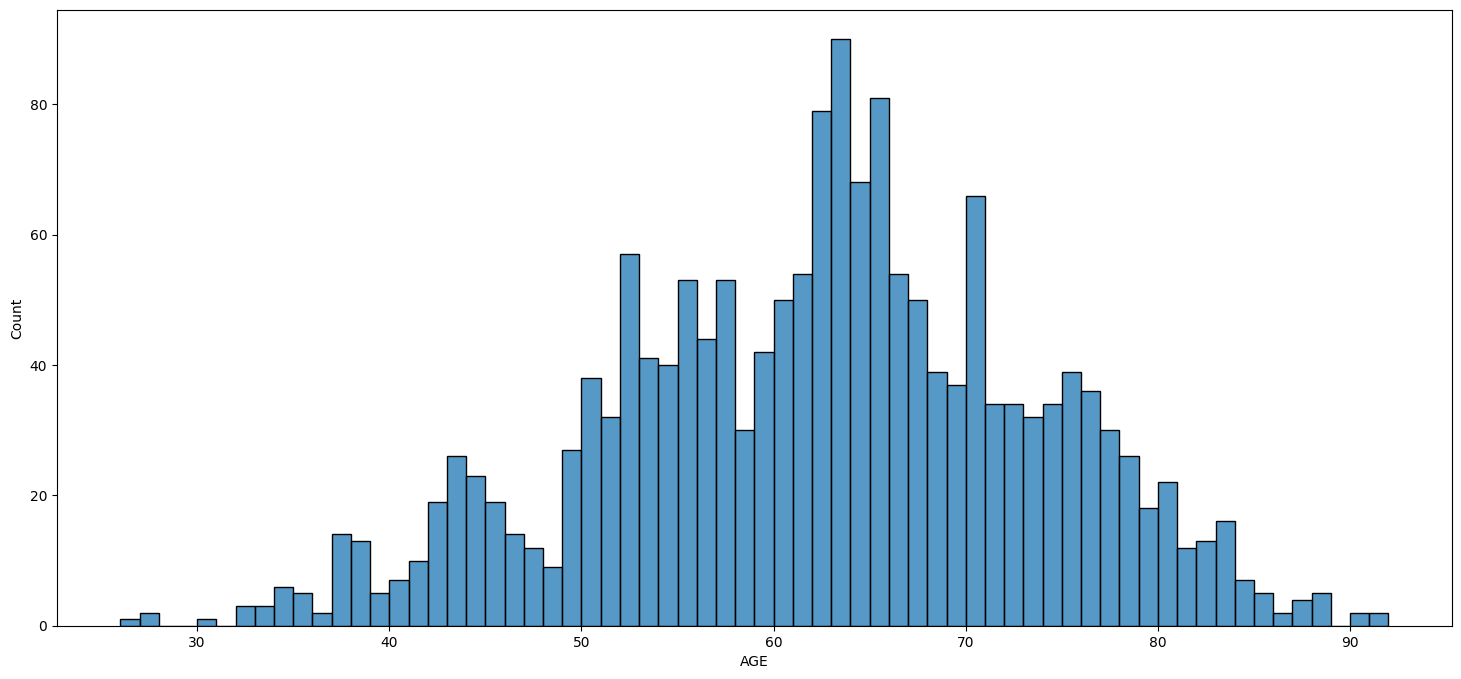

In [7]:
age_count = data['AGE'].value_counts().sort_index()
sorted_ages = data['AGE'].dropna().sort_values() #had to sort as they were unordered
plt.figure(figsize=(18,8)) #just making sure we have a big enough plot to display all ages clearly 
sns.histplot(sorted_ages, binwidth = 1)
plt.show()

SEX

SEX
1    1065
0     635
Name: count, dtype: int64


Text(0, 0.5, 'Count')

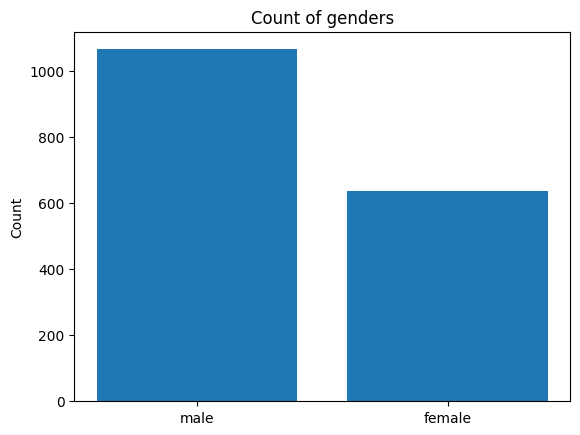

In [8]:
sex_count = data['SEX'].value_counts()
print(sex_count)
sex_categories = ['male', 'female']
plt.bar(sex_categories, sex_count)
plt.title("Count of genders")
plt.ylabel("Count")

Previous myocardial infarctions

INF_ANAM
0.0    1060
1.0     410
2.0     147
3.0      79
Name: count, dtype: int64


Text(0.5, 0, 'number of myocardial infarctions')

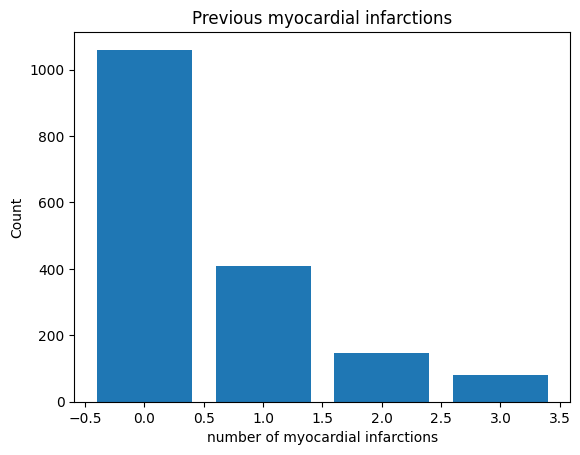

In [9]:
myo_infar_count = data['INF_ANAM'].value_counts()
print(myo_infar_count)
myoinfar_categories =myo_infar_count.index
plt.bar(myoinfar_categories, myo_infar_count)
plt.title("Previous myocardial infarctions")
plt.ylabel("Count") 
plt.xlabel("number of myocardial infarctions")

coronary heart disease

IBS_POST
2.0    683
1.0    548
0.0    418
Name: count, dtype: int64


Text(0, 0.5, 'Count')

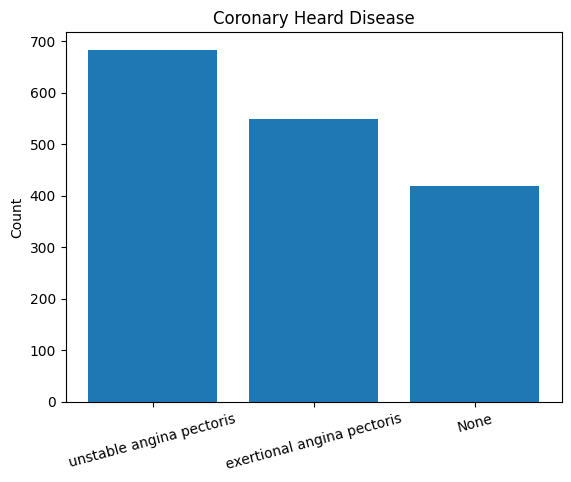

In [10]:
chd_count = data['IBS_POST'].value_counts()
print(chd_count)
categories = ['unstable angina pectoris', 'exertional angina pectoris', 'None']
plt.bar(categories, chd_count)
plt.xticks(rotation = 15)
plt.title("Coronary Heard Disease")
plt.ylabel("Count")

Heredity

IBS_NASL
0.0    45
1.0    27
Name: count, dtype: int64


Text(0.5, 1.0, 'Heredity of CHD')

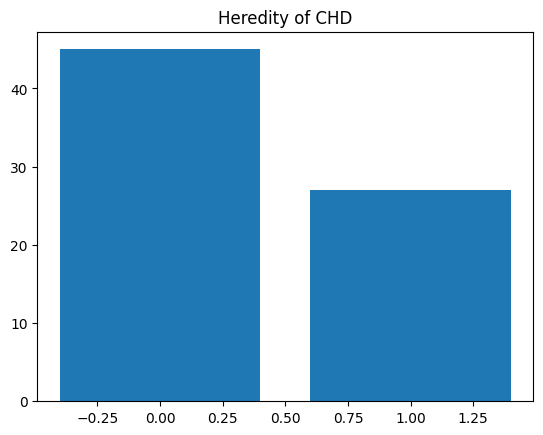

In [11]:
heredity_count = data['IBS_NASL'].value_counts()
print(heredity_count)
categories = heredity_count.index
plt.bar(categories, heredity_count) 
plt.title("Heredity of CHD")
#many empty values here 

Diabetes

endocr_01
0.0    1461
1.0     228
Name: count, dtype: int64


Text(0.5, 1.0, 'Individual suffers from diabetes')

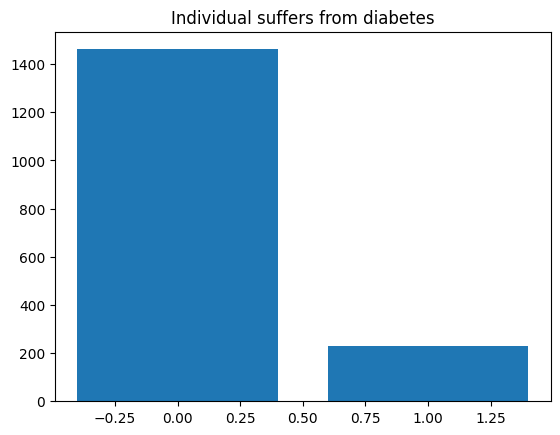

In [12]:
diabetes_count = data['endocr_01'].value_counts()
print(diabetes_count) 
categories = diabetes_count.index
plt.bar(categories, diabetes_count)
plt.title("Individual suffers from diabetes")

Obesity

endocr_02
0.0    1648
1.0      42
Name: count, dtype: int64


Text(0.5, 1.0, 'Individual suffers from obesity')

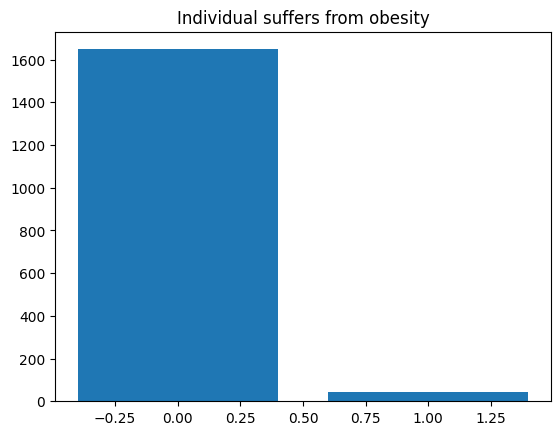

In [13]:
obesity_count = data['endocr_02'].value_counts() 
print(obesity_count)
categories = obesity_count.index
plt.bar(categories, obesity_count)
plt.title("Individual suffers from obesity")

Use of different drugs by emergency team 

In [14]:
drugs = [("opiod", 'NA_KB'), ("NSAIDs", 'NOT_NA_KB'), ("lidocaine", 'LID_KB')]
cols = []
for drug, column_name in drugs:
        column = data[column_name].sort_values()
        count = column.value_counts()
        print(f"{drug} administered: {count.get('1', 0)}")
        print(f"{drug} not administered: {count.get('0', 0)}")
        cols.append(column_name)
        print('\n')
drug_emergency_cols = data[cols]
null_counts = drug_emergency_cols.isnull().all().sum()
print(null_counts) #in all cases some drug was administered 

opiod administered: 0
opiod not administered: 0


NSAIDs administered: 0
NSAIDs not administered: 0


lidocaine administered: 0
lidocaine not administered: 0


0


use of drugs in the ICU

In [15]:
drugs = [("opiod first hour", 'NA_R_1_n'), ("opiods second day", 'NA_R_2_n'), ("opiods third day", 'NA_R_3_n'), ("liquid nitrates", 'NITR_S'),
        ("NSAIDs second day", 'NOT_NA_2_n'), ("NSAIDs third day", 'NOT_NA_3_n'), ("lidocaine", 'LID_S_n'), ("beta-blockers", 'B_BLOK_S_n'),
        ("calcium channel blockers", 'ANT_CA_S_n'), ("anticoagulants", 'GEPAR_S_n'), ("acetylsalicylic", 'ASP_S_n'), ("Ticlid", 'TRENT_S_n')]
for drug, column_name in drugs:
        column = data[column_name].sort_values()
        count = column.value_counts()
        if drug == "NSAIDs second day": 
            #special case handling for this column
            print(f"administration of NSAIDs in first hours of hospital period: {data['NOT_NA_1_n'].value_counts()}")
            print('\n')
        print(f"{drug} administered: {count.get('1', 0)}")
        print(f"{drug} not administered: {count.get('0', 0)}")
        print('\n')

opiod first hour administered: 0
opiod first hour not administered: 0


opiods second day administered: 0
opiods second day not administered: 0


opiods third day administered: 0
opiods third day not administered: 0


liquid nitrates administered: 0
liquid nitrates not administered: 0


administration of NSAIDs in first hours of hospital period: NOT_NA_1_n
0.0    1237
1.0     376
2.0      53
3.0      17
4.0       7
Name: count, dtype: int64


NSAIDs second day administered: 0
NSAIDs second day not administered: 0


NSAIDs third day administered: 0
NSAIDs third day not administered: 0


lidocaine administered: 0
lidocaine not administered: 0


beta-blockers administered: 0
beta-blockers not administered: 0


calcium channel blockers administered: 0
calcium channel blockers not administered: 0


anticoagulants administered: 0
anticoagulants not administered: 0


acetylsalicylic administered: 0
acetylsalicylic not administered: 0


Ticlid administered: 0
Ticlid not administered: 0




Lethal outcome

LET_IS
0    1429
1     110
2      18
3      54
4      23
5      12
6      27
7      27
Name: count, dtype: int64


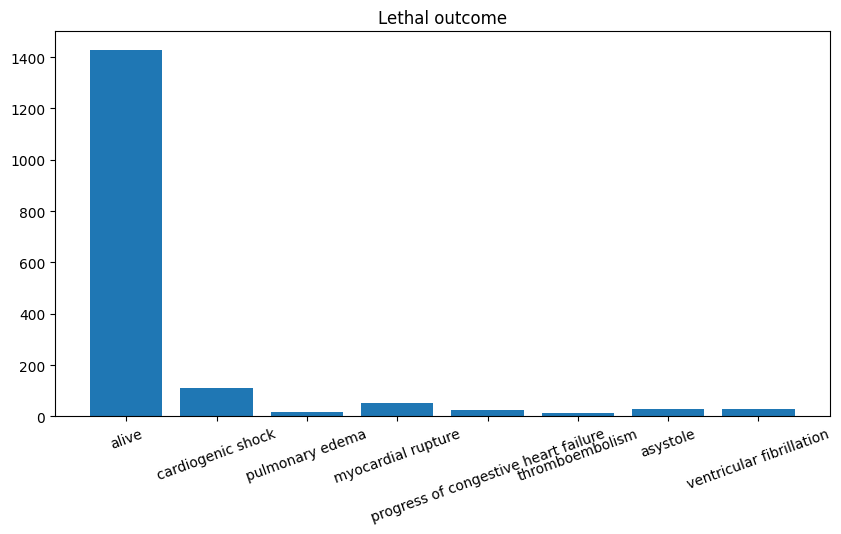

In [16]:
outcome = data['LET_IS'].value_counts().sort_index()
print(outcome)
categories = ["alive", "cardiogenic shock", "pulmonary edema", "myocardial rupture", "progress of congestive heart failure", "thromboembolism", 
              "asystole", "ventricular fibrillation"]
plt.figure(figsize=(10, 5))
plt.bar(categories, outcome) 
plt.title("Lethal outcome") 
plt.xticks(rotation = 20)
plt.show()

## Let's search for some dependencies in our data
Since we have lots of collumns, we need to evaluate beforehand which features and outcomes we want to plot against each other

### Let's just do some "blind" analysis

discard columns with too few entries

In [17]:
minimum_count_columns = data.count()[data.count() > 400].index.tolist()
print(len(minimum_count_columns))
data_reduced = data[minimum_count_columns]
data_reduced.drop(labels = ['ID'], axis = 1, inplace = True)


122


C:\Users\yoelh\AppData\Local\Temp\ipykernel_14608\1216092052.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reduced.drop(labels = ['ID'], axis = 1, inplace = True)


In [18]:
corr = data_reduced.corr()
abs_corr = corr.abs()
np.fill_diagonal(abs_corr.values, 0)
rows, cols = np.triu_indices_from(abs_corr, k=1)

high_corr_pairs = [(abs_corr.columns[i], abs_corr.columns[j], abs_corr.iloc[i, j])
                   for i, j in zip(rows, cols) if abs(abs_corr.iloc[i, j]) > 0.3]

high_corr_pairs_sorted = sorted(high_corr_pairs, key=lambda x: x[2], reverse=True)

print("High correlation pairs (column1, column2, correlation):")
for pair in high_corr_pairs_sorted:
    print(pair)


High correlation pairs (column1, column2, correlation):
('S_AD_ORIT', 'D_AD_ORIT', 0.8612659405801618)
('MP_TP_POST', 'ritm_ecg_p_02', 0.8456950630339481)
('S_AD_KBRIG', 'D_AD_KBRIG', 0.8441439684041745)
('GB', 'DLIT_AG', 0.7758654040495631)
('ritm_ecg_p_01', 'ritm_ecg_p_07', 0.7652924142188313)
('STENOK_AN', 'FK_STENOK', 0.7630190221557106)
('GIPO_K', 'K_BLOOD', 0.7159237474957532)
('nr_04', 'n_r_ecg_p_06', 0.6855221268979511)
('ritm_ecg_p_04', 'n_p_ecg_p_06', 0.6770057912691977)
('ritm_ecg_p_02', 'n_r_ecg_p_05', 0.6397100814551602)
('R_AB_2_n', 'NA_R_2_n', 0.6190305355513314)
('S_AD_KBRIG', 'S_AD_ORIT', 0.611364727936855)
('R_AB_3_n', 'NA_R_3_n', 0.5971399567602095)
('MP_TP_POST', 'n_r_ecg_p_05', 0.5969615355522121)
('SVT_POST', 'n_r_ecg_p_08', 0.5655622620267294)
('ant_im', 'inf_im', 0.5606244815486715)
('ant_im', 'lat_im', 0.560580173953938)
('R_AB_1_n', 'NA_R_1_n', 0.5569258808007785)
('D_AD_KBRIG', 'D_AD_ORIT', 0.5559600310828934)
('S_AD_KBRIG', 'D_AD_ORIT', 0.5555008545642365)
(

In [19]:
unique_columns = set()
for pair in high_corr_pairs_sorted:
    unique_columns.update([pair[0], pair[1]])
target_variables = {"FIBR_PREDS", "PREDS_TAH", "JELUD_TAH", "FIBR_JELUD", 
                   "A_V_BLOK", "OTEK_LANC", "RAZRIV", "DRESSLER", 
                   "ZSN", "REC_IM", "P_IM_STEN", "LET_IS"}
present_values = target_variables & unique_columns
if present_values:
    print("The following targets are present in the set:")
    print(present_values)
else:
    print("None of the specified values is present in the set.")

The following targets are present in the set:
{'LET_IS', 'OTEK_LANC', 'RAZRIV'}


In [20]:
pairs_with_LET_IS = [pair for pair in high_corr_pairs_sorted if "LET_IS" in pair[:2]]

if pairs_with_LET_IS:
    print("The pairs with 'LET_IS' are:")
    for pair in pairs_with_LET_IS:
        print(pair)
else:
    print("No pairs with 'LET_IS' were found.")

The pairs with 'LET_IS' are:
('RAZRIV', 'LET_IS', 0.33080044048706464)


In [21]:
pairs_with_RAZRIV = [pair for pair in high_corr_pairs_sorted if "RAZRIV" in pair[:2]]

if pairs_with_RAZRIV:
    print("The pairs with 'RAZRIV' are:")
    for pair in pairs_with_RAZRIV:
        print(pair)
else:
    print("No pairs with 'RAZRIV' were found.")

The pairs with 'RAZRIV' are:
('RAZRIV', 'LET_IS', 0.33080044048706464)


In [22]:
pairs_with_OTEK_LANC = [pair for pair in high_corr_pairs_sorted if "OTEK_LANC" in pair[:2]]

if pairs_with_OTEK_LANC:
    print("The pairs with 'OTEK_LANC' are:")
    for pair in pairs_with_OTEK_LANC:
        print(pair)
else:
    print("No pairs with 'OTEK_LANC' were found.")

The pairs with 'OTEK_LANC' are:
('NITR_S', 'OTEK_LANC', 0.3213941716334199)


We have three targets which have a correlation value above 0.3. However Myocardial rupture correlates with lethality (so two outcomes, which makes sense), and pulmonary edema with use of liquid nitrates in the ICU, but the use of liquid nitrates seems to be a standard treatment when there is a pulmonary edema:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5408000/

### Redo the analysis with a lower threshold of 0.2

In [23]:
high_corr_pairs = [(abs_corr.columns[i], abs_corr.columns[j], abs_corr.iloc[i, j])
                   for i, j in zip(rows, cols) if abs(abs_corr.iloc[i, j]) > 0.2]

high_corr_pairs_sorted = sorted(high_corr_pairs, key=lambda x: x[2], reverse=True)

unique_columns = set()
for pair in high_corr_pairs_sorted:
    unique_columns.update([pair[0], pair[1]])
target_variables = {"FIBR_PREDS", "PREDS_TAH", "JELUD_TAH", "FIBR_JELUD", 
                   "A_V_BLOK", "OTEK_LANC", "RAZRIV", "DRESSLER", 
                   "ZSN", "REC_IM", "P_IM_STEN", "LET_IS"}
present_values = target_variables & unique_columns
if present_values:
    print("The following targets are present in the set:")
    print(present_values)
else:
    print("None of the specified values is present in the set.")

The following targets are present in the set:
{'FIBR_PREDS', 'A_V_BLOK', 'FIBR_JELUD', 'LET_IS', 'OTEK_LANC', 'RAZRIV', 'PREDS_TAH'}


In [24]:
def corr_finder(target):    
    pairs = [pair for pair in high_corr_pairs_sorted if target in pair[:2]]

    if pairs:
        print("The pairs with ", target," are:")
        for pair in pairs:
            print(pair)
    else:
        print("No pairs with ", target," were found.")

In [25]:
corr_finder('FIBR_JELUD')

The pairs with  FIBR_JELUD  are:
('LID_S_n', 'FIBR_JELUD', 0.2151679720412839)


Use of lidocaine in ICU is related with Atrial fibrilation

In [26]:
corr_finder('RAZRIV')

The pairs with  RAZRIV  are:
('RAZRIV', 'LET_IS', 0.33080044048706464)


same as before

In [27]:
corr_finder('A_V_BLOK')

The pairs with  A_V_BLOK  are:
('inf_im', 'A_V_BLOK', 0.21452922487323914)


Presence of an inferior myocardial infarction (left ventricular) is related to third degree AV-block

In [28]:
corr_finder('PREDS_TAH')

The pairs with  PREDS_TAH  are:
('n_r_ecg_p_08', 'PREDS_TAH', 0.23891772625852836)
('SVT_POST', 'PREDS_TAH', 0.2379324929467789)


supraventricular tachycardia is related to brachycardia at admission and Paroxysms of supraventricular tachycardia at the time of admission to intensive care unit

In [29]:
corr_finder('LET_IS')

The pairs with  LET_IS  are:
('RAZRIV', 'LET_IS', 0.33080044048706464)


same as before

In [30]:
corr_finder('OTEK_LANC')

The pairs with  OTEK_LANC  are:
('NITR_S', 'OTEK_LANC', 0.3213941716334199)


same as before

In [31]:
corr_finder('FIBR_PREDS')

The pairs with  FIBR_PREDS  are:
('n_r_ecg_p_05', 'FIBR_PREDS', 0.21869776723238601)


Atrial fibrilation is related to Paroxysms of atrial fibrillation on ECG at the time of admission to hospital
(which kind of makes sense)

In [32]:
import statsmodels.formula.api as sm
# logistic regression fit
reg = sm.logit(formula='PREDS_TAH ~  SVT_POST + n_r_ecg_p_08', data=data_reduced).fit()
# use the following line to filter for institution:
# data_manipulation2.loc[data_manipulation2['institution'] == 'Centre Léon Bérard']
print(reg.summary())

Optimization terminated successfully.
         Current function value: 0.050442
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              PREDS_TAH   No. Observations:                 1575
Model:                          Logit   Df Residuals:                     1572
Method:                           MLE   Df Model:                            2
Date:                Fri, 03 May 2024   Pseudo R-squ.:                  0.1108
Time:                        15:10:00   Log-Likelihood:                -79.446
converged:                       True   LL-Null:                       -89.349
Covariance Type:            nonrobust   LLR p-value:                 5.004e-05
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -4.7869      0.279    -17.184      0.000      -5.333      -4.241
SVT_POST         3.7443

We can see here, that we definitely need to take into account how the features interact with each other as bradycardia loses it's significant effect as soon as we do a regression for bradycardia AND tachycardia

In [44]:
import sklearn.decomposition
data_reduced2 = data_reduced.drop(['LET_IS'],axis = 1)
data_reduced2.dropna(inplace = True)
PCA = sklearn.decomposition.PCA(n_components = 2)
PCA.fit(data_reduced2)
PCA.explained_variance_ratio_

array([0.64521328, 0.18650869])